# Space Titanic Machine Learning

## <a id='toc1_1_'></a>[Initial Configuration](#toc0_)

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Global Variables

In [2]:
# Global Variables
train_path = './train.csv'

target = 'Transported'

#### Helper Functions

In [3]:
# Helper function for the pie charts we like
def do_pie(df, col):
    value_counts = df[col].value_counts()
    plt.pie(value_counts, labels=value_counts.keys(), autopct='%1.1f%%', startangle=90)
    plt.title("Pie Chart of " + col)
    plt.show()

In [4]:
# Helper function to plot side-by-side pie charts for the different survival rates for differing values in a column
#   NOTE: the otherCol needs to be a boolean column with value counts else this function will likely break
def plot_survival_representation(df, col, otherCol=target):
    grouped = df.groupby([col, otherCol]).size().unstack().fillna(0)
    value_counts = df[col].value_counts()
    target_labels = df[otherCol].value_counts().keys()
    fig, axes = plt.subplots(1, len(value_counts.keys()), figsize=(16,6))
    for idx, key in enumerate(value_counts.keys()):
        axes[idx].pie(grouped.loc[key], labels=target_labels, autopct='%1.1f%%', startangle=90)
        axes[idx].set_title(col + " " + str(key))
    plt.show()

## <a id='toc1_2_'></a>[EDA](#toc0_)

#### <a id='toc1_2_1_1_'></a>[General Analysis](#toc0_)

In [5]:
df = pd.read_csv(train_path)

# Break if the df is empty
assert(df.shape[0] and df.shape[1])

In [6]:
len(df)

8693

Initial Observations from describing the dataframe:

* **Age** seems fairly normal with a mean of 29, min of 0, and max of 80. Pretty much the same as the ages on the real titanic
* **Room service** is between 0 and 14,327 and hass a mean of 666. It is likely there will be some outliers
* **Food Court** is between 0 and 29,813 and has a mean of 458. So it has a lower mean with a higher range and a higher standard deviation, so some cleaning may need to be done with this variable.
* **Shopping Mall** is between 0 and 23492 with a mean of 173. It has a very low mean and a high range of values which will need some cleaning
* **Spa** is between 0 and 22408 with a mean of 311. It isn't as bad as food court or shopping mall, but will still need to be looked at more closely
* **VRDeck** is between 0 and 24133 with a mean of 304, exibiting the statistics shown by the sspa

In [7]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

Many of the columns exibit missing values. None have more than about 2.3% total, so they can likely be inferred.

It will be noteworth to try to observe rows that contain missing values and see if they coincide

In [9]:
print("Missing Values: \n", end = '-' * 50 + '\n')
for col in df.columns:
    print(col, ": ", df[col].isna().sum(), "%", df[col].isna().sum()/len(df))

Missing Values: 
--------------------------------------------------
PassengerId :  0 % 0.0
HomePlanet :  201 % 0.023122052225928908
CryoSleep :  217 % 0.02496261359714713
Cabin :  199 % 0.02289198205452663
Destination :  182 % 0.02093638559760727
Age :  179 % 0.020591280340503854
VIP :  203 % 0.023352122397331185
RoomService :  181 % 0.02082135051190613
FoodCourt :  183 % 0.021051420683308408
ShoppingMall :  208 % 0.02392729782583688
Spa :  183 % 0.021051420683308408
VRDeck :  188 % 0.021626596111814105
Name :  200 % 0.023007017140227768
Transported :  0 % 0.0


### Exploring Individual Variables

#### Exploring Target Variable

The distribution for the target variable is impeccably clean and will not need any adjustments to be made for training a machine learning model.

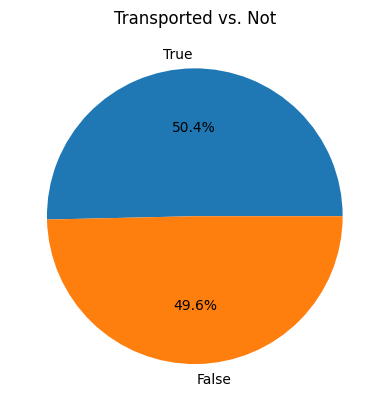

In [10]:
survived_counts = df[target].value_counts()
plt.pie(survived_counts, labels=survived_counts.keys(), autopct="%1.1f%%")
plt.title("Transported vs. Not")
plt.show()

#### Exploring Home Planet

There is a slight imbalance of passengers from Earth, and only '''20.7%''' of the population is from Mars, which is verging from a **mild** to a **moderate** data imalance according to Google's own definition.

REF: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data#:~:text=A%20classification%20data%20set%20with,smaller%20proportion%20are%20minority%20classes.

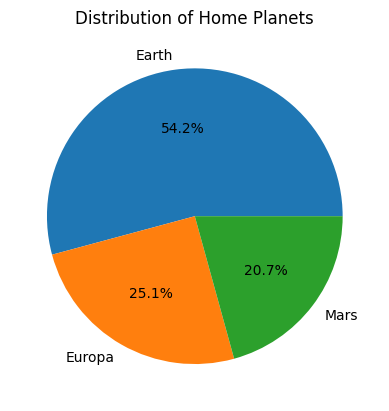

In [11]:
home_planet_counts = df['HomePlanet'].value_counts()
plt.pie(home_planet_counts, labels=home_planet_counts.keys(), autopct="%1.1f%%")
plt.title("Distribution of Home Planets")
plt.show()

From plotting the target variable of transported with each of the different homeworlds we see some interesting observations.

* **Earth** tends to have the most people transporting, about 7% more than the cumulative population
* **Europe** has the highest proportion of people not transporting with a 16% difference from the cumulative population
* **Mars** very nearly mirrors the transportation pattern of the general populus

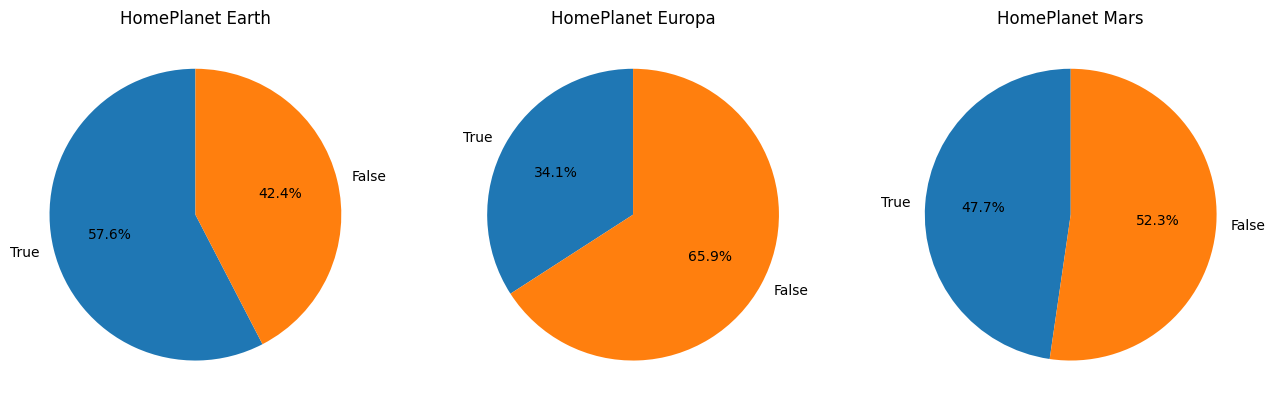

In [12]:
plot_survival_representation(df, 'HomePlanet')

In [13]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

#### Exploring Cryo Sleep

We are able to see that most people did not go under cryosleep and that there is a **mild** data imbalance around the variable

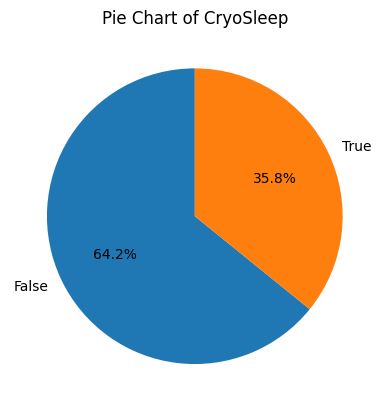

In [14]:
do_pie(df, 'CryoSleep')

Significantly fewer of those who underwent cryosleep were transported. only '''18.2%''' of those who slept were transported.
On the other hand, '''67.1%''' of those who did not sleep were transported away. 

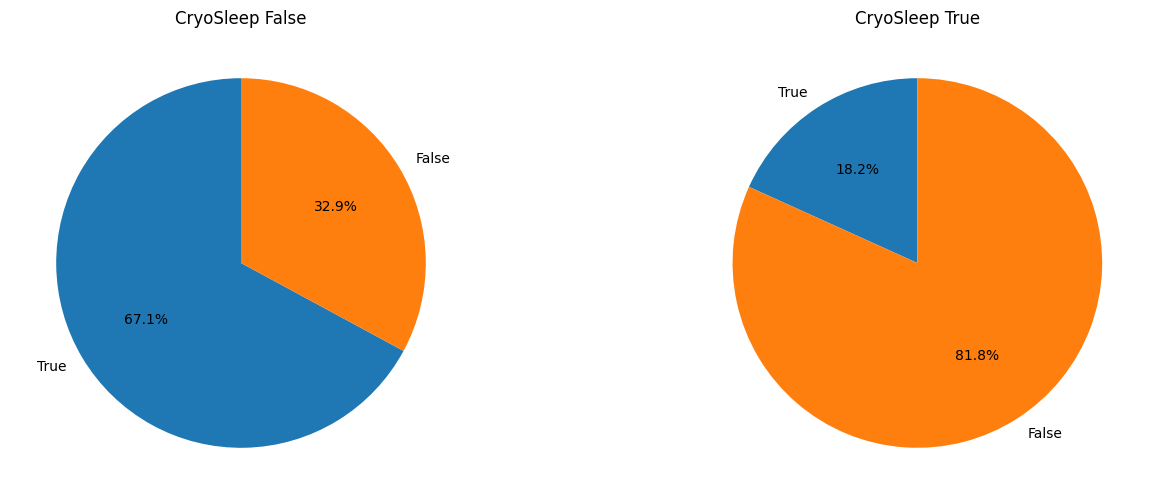

In [15]:
plot_survival_representation(df, 'CryoSleep')

#### Exploring Cabin

We know from the description that the cabin number takes the form deck/num/side, where side can be either P for Port or S for Starboard.

We will likely take interest in splitting this variable into 3 separate columns for the actual full location to be represented in machine learning``

In [16]:
df['Cabin'].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

#### Exploring Destination

There is a **Moderate** Imbalance on the distribution with a heavy skew going to ```TRAPPIST-1e```, and less than 10% of the passengers going to ```PSO```

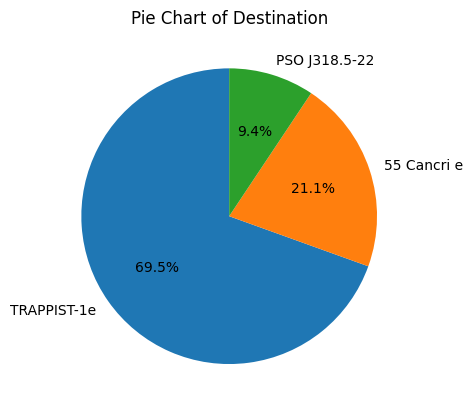

In [17]:
do_pie(df, 'Destination')

We see that there seems to be a noteworthy skew of passengers being safe when travelling to Cancri

It is also worthy to note that this destination may not be the true/main correlation with actually transporting. It is quite possible that those who went to Cancri needed to be in Cryo or something of the like.

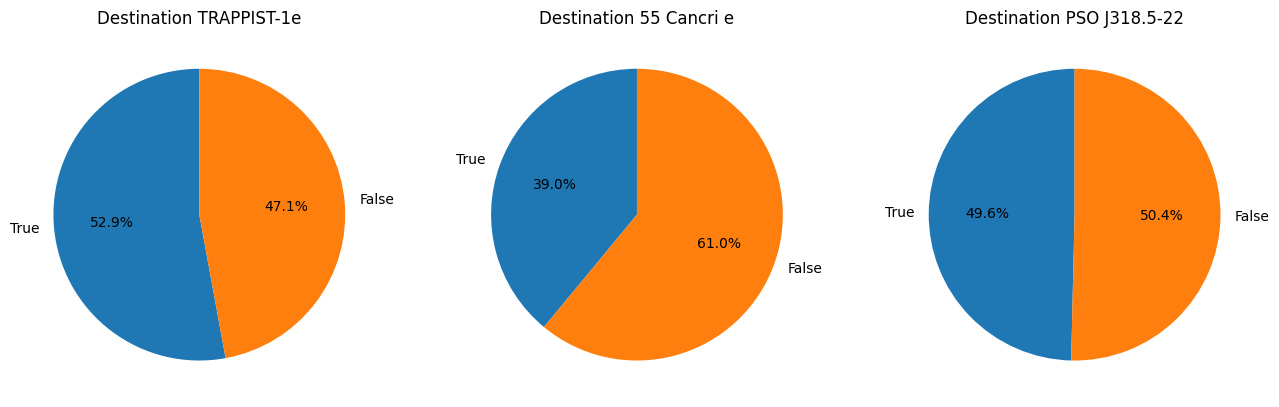

In [18]:
plot_survival_representation(df, 'Destination')

We don't seem to see any significant overlap with the trends visually when plotting the destinations with those who underwent cryosleep, so the above hypothesis may be tabled regarding cryosleep. However, the home planet may be of interest as well.

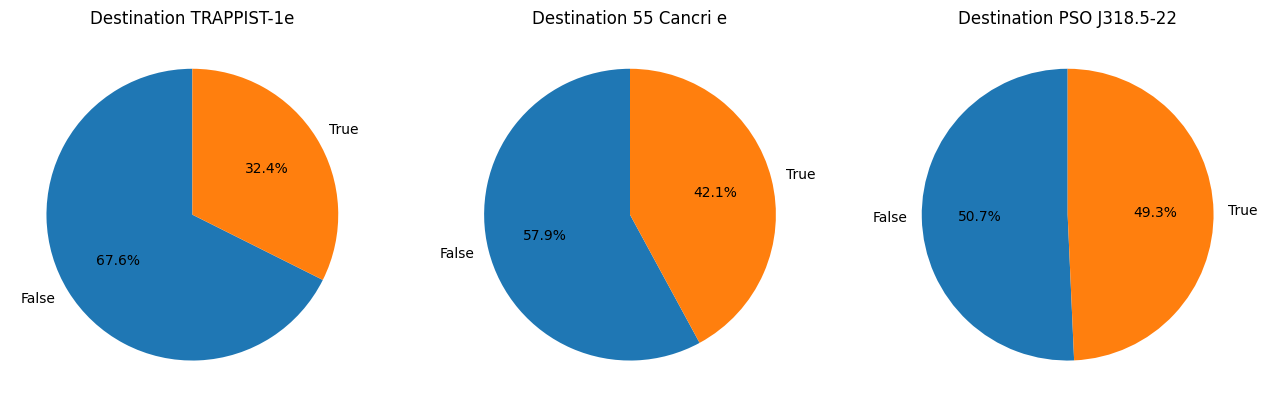

In [19]:
plot_survival_representation(df, 'Destination', 'CryoSleep')

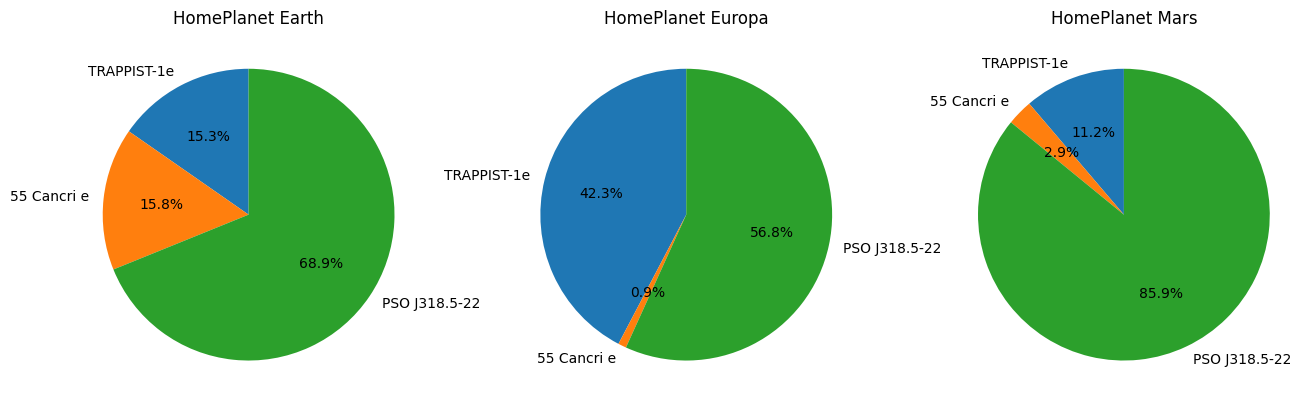

In [20]:
plot_survival_representation(df, 'HomePlanet', 'Destination')

#### <a id='toc1_2_1_4_'></a>[Exploring Age](#toc0_)

Showing a boxplot of the ages, we see that most passengers are between 0 and 65 (which generally was a good representation of the human population at the time). Older folks between 65-80 are outliers. 

It may be useful to bin these ages and analyze survivors between these bins.

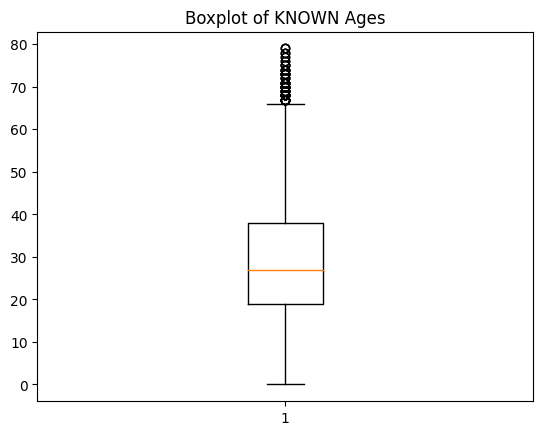

In [21]:
# plt.boxplot(df.dropna(subset=['Age'])['Age'])
plt.boxplot(df.dropna(subset=['Age'])['Age'])
plt.title("Boxplot of KNOWN Ages")
plt.show()

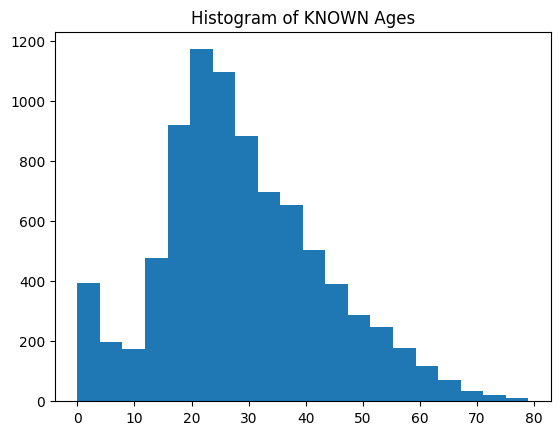

In [22]:
plt.hist(df.dropna(subset=['Age'])['Age'], bins=20)
plt.title("Histogram of KNOWN Ages")
plt.show()

Looking at a stacked bar chart of age and those who were transported, it seems that there is some interesting patterns where the column heights are unaligned in passengers younger than 18.

The rest of the passengers seem to follow somewhat uniform behavior.

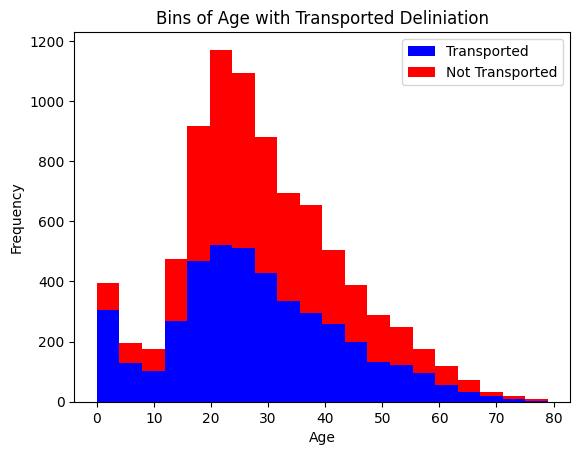

In [23]:
# Separate the 'Age' values based on 'Transported' values
age_transported = df[df['Transported'] == True]['Age']
age_not_transported = df[df['Transported'] == False]['Age']

# Create a stacked histogram
plt.hist([age_transported, age_not_transported], bins=20, stacked=True, color=['blue', 'red'], label=['Transported', 'Not Transported'])

# Add labels and a legend
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Bins of Age with Transported Deliniation")
plt.legend()

# Show the histogram
plt.show()

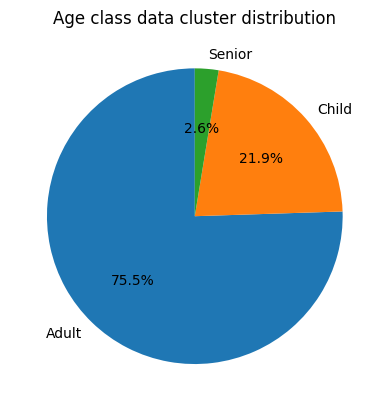

In [24]:
# Define the bin edges and labels
bins = [0, 18, 60, float('inf')]  # The bin edges

labels = [1, 2, 3]  # The corresponding labels for the bins

df.dropna(subset=['Age'], inplace=True)

# Create the "Age Group" column
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Convert the "Fare_class" column to integers (if needed)
df['Age_group'] = df['Age_group'].astype(int)

fare_class_values = df['Age_group'].value_counts()
plt.pie(fare_class_values, labels=["Adult", "Child", "Senior"], autopct='%1.1f%%', startangle=90)
plt.title("Age class data cluster distribution")
plt.show()

In [25]:
fare_class_values

Age_group
2    6429
1    1865
3     220
Name: count, dtype: int64

By binning some conventional age values that might represent one's ability to properly evacuate a sinking ship, we are able to see that indeed, most children lived, a proportional distribution of adults lived, and a disproportional percentage of older folks died.

An issue with this binning is that MOST passengers are of adult age, so this approach may introduce bias in our data. Nonetheless it is interesting.

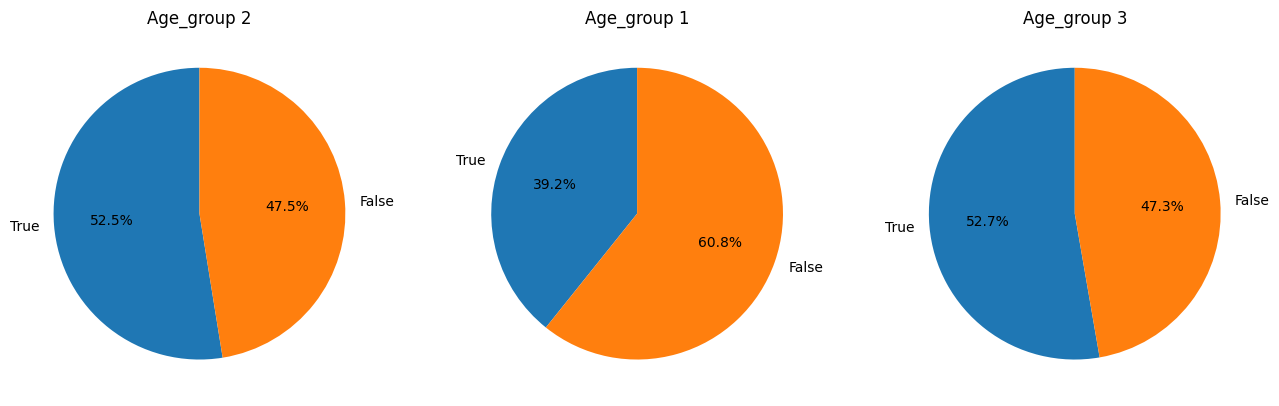

In [26]:
plot_survival_representation(df, 'Age_group')

#### Exploring VIP

VIP Passengers are certainly a minority, coming near to an **extreme** imbalance with only ```2.4%``` of the full population.

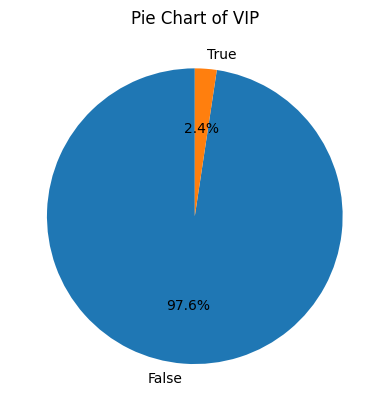

In [27]:
do_pie(df, 'VIP')

Those who paid for a special VIP service have a little more likelihood to be transported to another dimension, though it doesn't appear to be a particularly strong correlation, given the imbalance of the distribution for the variable.

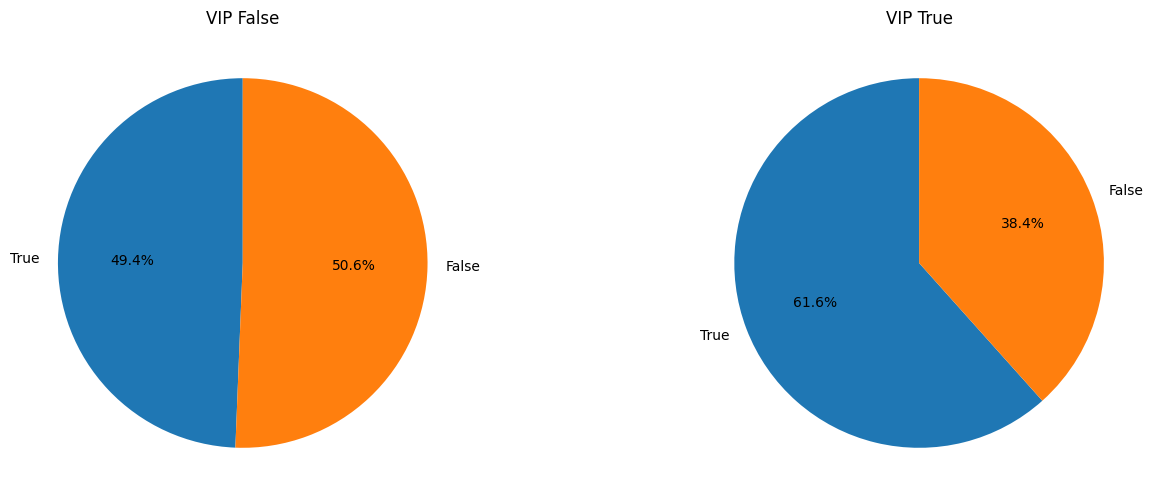

In [28]:
plot_survival_representation(df, 'VIP')

#### Exploring Room Service

The room service boxplot shows that most people spent nearly nothing on room service, and there are many outliers for those who spent up to 5,000 on room service, and a few outliers who spent more than 5,000.

There will need to be some effort to account for the outliers here.

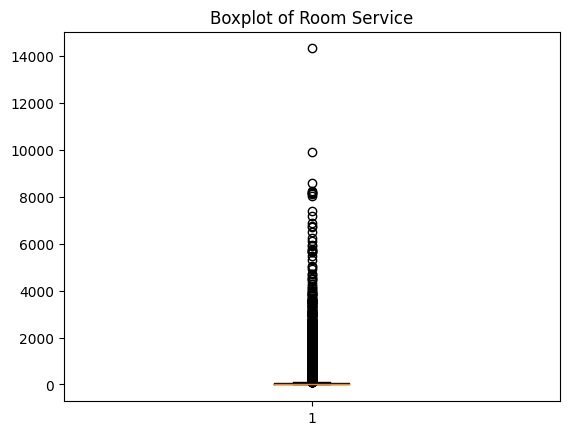

In [29]:
# plt.boxplot(df.dropna(subset=['Age'])['Age'])
plt.boxplot(df.dropna(subset=['RoomService'])['RoomService'])
plt.title("Boxplot of Room Service")
plt.show()

With the histogram of Room Service below, we are able to see that most people payed < $100 for room service. There is a big cluster between 100-900 for room service, and then outliers > 900.

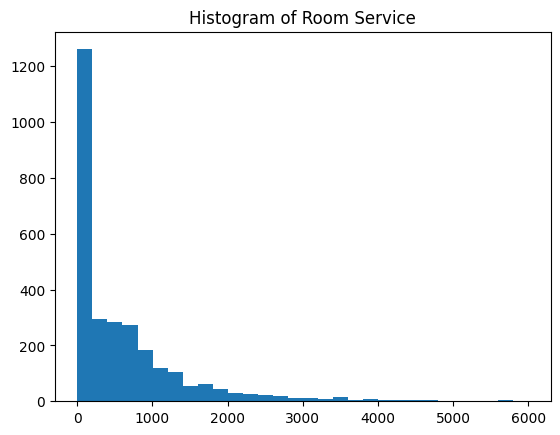

In [30]:
plt.hist(df['RoomService'], bins=30, range=(1, 6000))
plt.title("Histogram of Room Service")
plt.show()

Given that more than 50% of the passengers didn't pay anything for room service, it may be best to do one of the two solutions:
* 1) Make the variable boolean for "paid room service"
* 2) Bin the variable at 0, 1 < 900, 900+

In [31]:
print(df['RoomService'].value_counts()[0], "people didn't pay anything for room service out of the population of", len(df), "people.")

5452 people didn't pay anything for room service out of the population of 8514 people.


#### Exploring Food Court

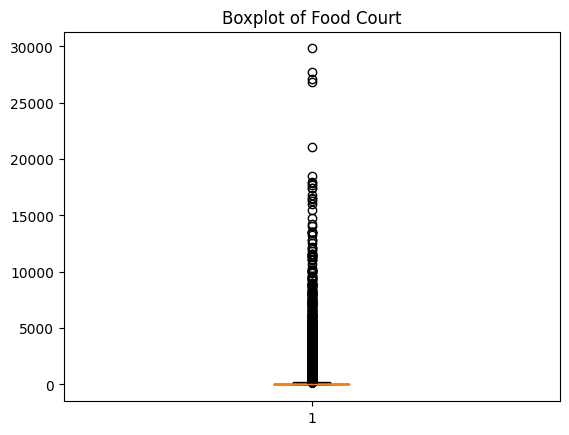

In [32]:
plt.boxplot(df.dropna(subset=['FoodCourt'])['FoodCourt'])
plt.title("Boxplot of Food Court")
plt.show()

Compared to Room Service, the histogram of Food Court shows there is much more diversity in the amount spent on the food court.
* It may be more worthwhile to consider binning the amount one spends on the food court given the diversity

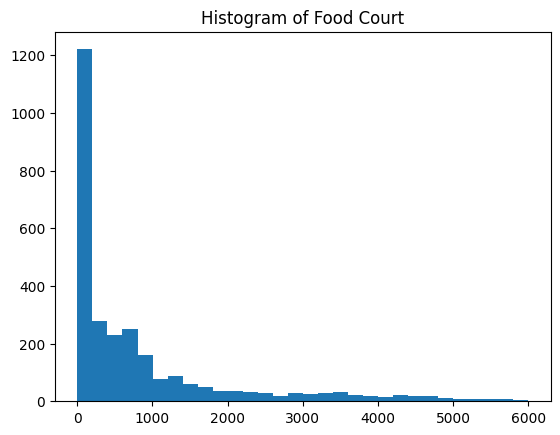

In [33]:
plt.hist(df['FoodCourt'], bins=30, range=(1, 6000))
plt.title("Histogram of Food Court")
plt.show()

In [34]:
print(df['FoodCourt'].value_counts()[0], "people didn't pay anything for food courts out of the population of", len(df), "people.")

5343 people didn't pay anything for food courts out of the population of 8514 people.


#### Exploring Shopping Mall

This boxplot is a little more tight, with one insane outlier.

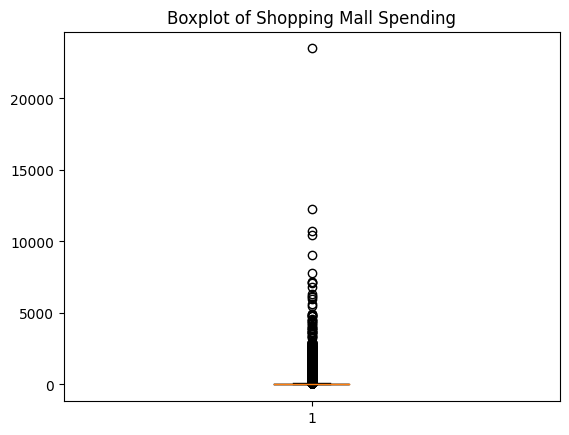

In [35]:
plt.boxplot(df.dropna(subset=['ShoppingMall'])['ShoppingMall'])
plt.title("Boxplot of Shopping Mall Spending")
plt.show()

Since the shopping mall histogram is pretty tight with not many outliers, it may be best to convert this variable into a boolean.

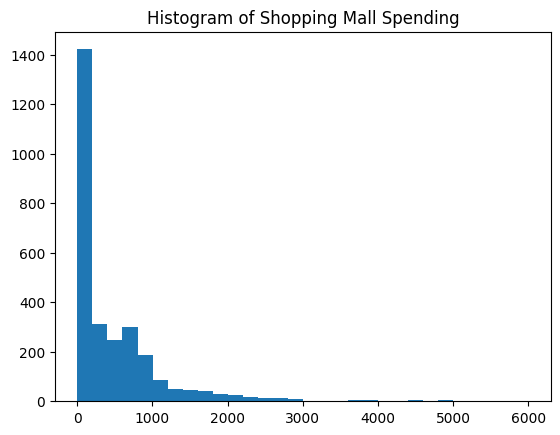

In [36]:
plt.hist(df['ShoppingMall'], bins=30, range=(1, 6000))
plt.title("Histogram of Shopping Mall Spending")
plt.show()

In [37]:
print(df['ShoppingMall'].value_counts()[0], "people didn't pay anything for the shopping mall out of the population of", len(df), "people.")

5464 people didn't pay anything for the shopping mall out of the population of 8514 people.


#### Exploring Spa

The boxplot shows that most people spent nothing on the spa, and there is a wide cluster of those who spend 1 < x < 10k on the spa, and another cluster between 11k and 20k on the spa.

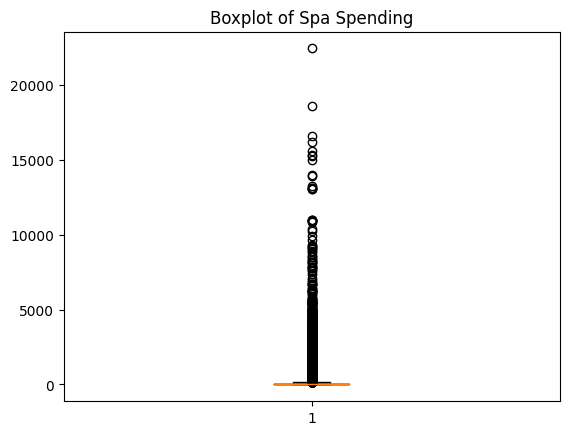

In [38]:
plt.boxplot(df.dropna(subset=['Spa'])['Spa'])
plt.title("Boxplot of Spa Spending")
plt.show()

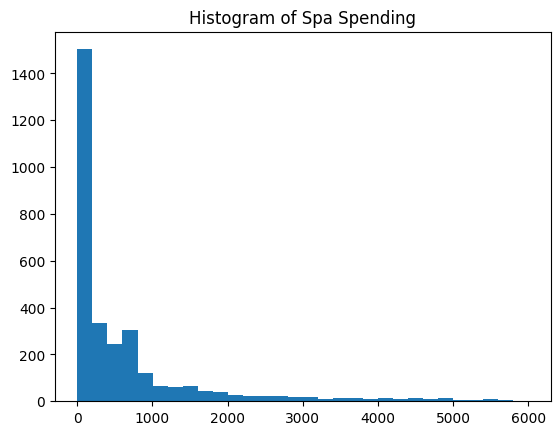

In [39]:
plt.hist(df['Spa'], bins=30, range=(1, 6000))
plt.title("Histogram of Spa Spending")
plt.show()

In [40]:
print(df['Spa'].value_counts()[0], "people didn't pay anything for the spa out of the population of", len(df), "people.")

5206 people didn't pay anything for the spa out of the population of 8514 people.


#### Exploring the VR Deck

While many people didn't spend anything on the VR Deck, a larger population compared to the other numerical spending-variables spent *something* on the VR Deck of less than $10,000

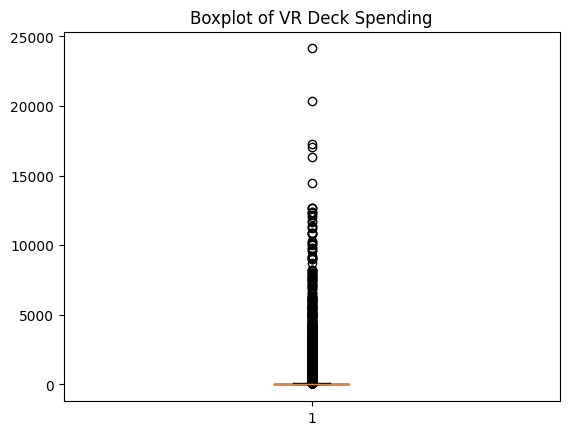

In [41]:
plt.boxplot(df.dropna(subset=['VRDeck'])['VRDeck'])
plt.title("Boxplot of VR Deck Spending")
plt.show()

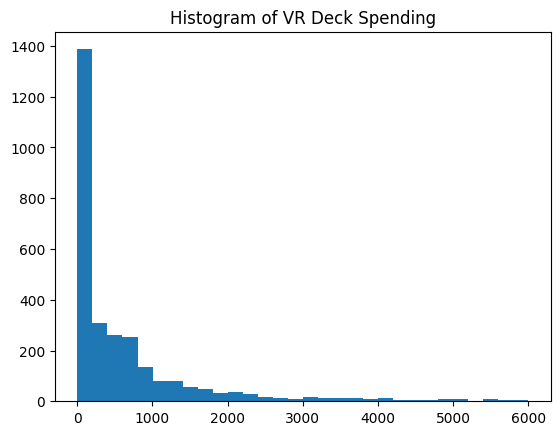

In [42]:
plt.hist(df['VRDeck'], bins=30, range=(1, 6000))
plt.title("Histogram of VR Deck Spending")
plt.show()

In [43]:
print(df['VRDeck'].value_counts()[0], "people didn't pay anything for the VR Deck out of the population of", len(df), "people.")

5373 people didn't pay anything for the VR Deck out of the population of 8514 people.


### Correlation Matrix

In [44]:
df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Age_group'])

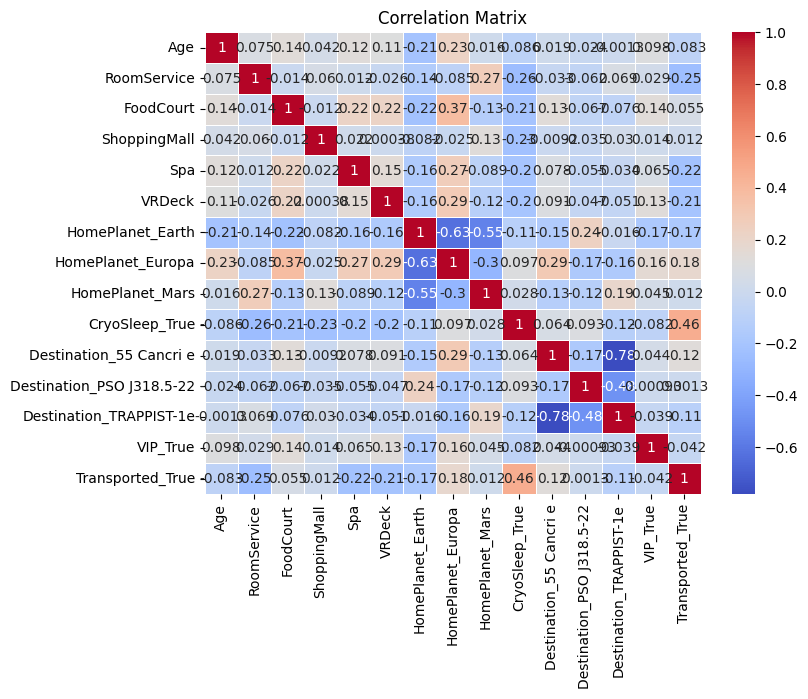

In [45]:
feature_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck",
                "HomePlanet_Earth", "HomePlanet_Europa", "HomePlanet_Mars",
                "CryoSleep_True", "Destination_55 Cancri e", "Destination_PSO J318.5-22",
                "Destination_TRAPPIST-1e", "VIP_True", "Transported_True"]

# Compute the correlation matrix
correlation_matrix = df[feature_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix')
plt.show()

## <a id='toc1_3_'></a>[Cleaning](#toc0_)

From our EDA, we have noted a few necessary considerations to make during the Data Cleaning phase before it is fed into a statistical model.

* **Age** has some correlation for those under 16. It may be worth binning age at these values. If we keep the original variable, it will need to be normalized
* **Room Service** should be either made boolean or binned 0, < 900, 900+
* **Food Court** should be made boolean or binned (not sure which numbers are best yet)
* **Shopping Mall** should be made boolean
* **Spa** should be made boolean
* **VR Deck** should be either made boolean or binned 0, 900, 900+
* Categorical columns should be encoded
* Certain categories should be potentially undersampled or oversampled
* The **Cabin** should be split into 3 new columns: **Cabin_deck**, **Cabin_num**, and **Cabin_side** (which would be either ```P``` for Port or ```S``` for Starboard)

#### Exploring Missing Values

In [46]:
df = pd.read_csv('./train.csv')
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

On first impression, it seems that the missing values are sparsely distributed accross rows, which is good because it means that inferring missing values is a strong possibility.

In [47]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_with_missing_values.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
25,0020_05,Earth,True,E/0/S,PSO J318.5-22,1.0,False,NaN,0.0,0.0,0.0,0.0,Mael Brantuarez,False
27,0022_01,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False
28,0024_01,Europa,True,C/2/S,TRAPPIST-1e,62.0,False,0.0,0.0,NaN,0.0,0.0,Penton Fullided,True
35,0031_03,Mars,False,F/9/P,TRAPPIST-1e,20.0,False,NaN,0.0,1750.0,990.0,0.0,Dontch Datie,True
38,0036_01,Earth,False,F/8/S,55 Cancri e,15.0,NaN,0.0,492.0,48.0,20.0,401.0,Marina Leodger,False


By calculating the rows with missing values and viewing the unique missing values we are able to see that there isn't too much overlap between the missing values.

In [48]:
print("There are", len(rows_with_missing_values), "rows with missing values.")
totalMissingValues = 0
for key in df.isna().sum().keys():
    totalMissingValues = totalMissingValues + df.isna().sum()[key]
print("There are", totalMissingValues, "total missing values.")

There are 2087 rows with missing values.
There are 2324 total missing values.


#### Cleaning Pipeline

In [49]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [50]:
df['Cabin'].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

In [51]:
# Data cleaning pipeline
def preprocess(df):
    df = df.copy()

    # Drop name and passengerID
    df.drop(["Name", "PassengerId"], axis=1, inplace=True)

    # Set missing values in money-spending columns to 0
    money_spending_columns = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    for col in money_spending_columns:
        df[col].fillna(0)

    def cabin_deck(x):
        items = x.split('/')
        if len(items) < 1:
            return ""
        return items[0]
    
    def cabin_num(x):
        items = x.split('/')
        if len(items) < 2:
            return 0
        return items[1]

    def cabin_side(x):
        items = x.split('/')
        if len(items) < 3:
            return ""
        return items[-1]
    
    def money_spent(x):
        return True if x > 0 else False
    
    # Convert the cabin columns to meaningful values
    df['Cabin'] = df['Cabin'].astype(str)
    df['Cabin_deck'] = df['Cabin'].apply(cabin_deck)
    df['Cabin_num'] = df['Cabin'].apply(cabin_num)
    df['Cabin_side'] = df['Cabin'].apply(cabin_side)

    # Set null Cabin_deck values to cabin G which has the most neutral representation same as null values
    # df['Cabin_deck'].fillna('G', inplace=True)
    def set_to_g(x):
        return 'G' if x == 'nan' else x
    
    df['Cabin_deck'].apply(set_to_g)
    df['Cabin_deck'].fillna('G', inplace=True)
    df['Cabin_num'] = df['Cabin_num'].astype(int)

    # df['RoomService'] = df['RoomService'].apply(money_spent)
    # df['FoodCourt'] = df['FoodCourt'].apply(money_spent)
    # df['ShoppingMall'] = df['ShoppingMall'].apply(money_spent)
    # df['Spa'] = df['Spa'].apply(money_spent)
    # df['VRDeck'] = df['VRDeck'].apply(money_spent)

    # Assume null VIP values mean false
    df['VIP'] = df['VIP'].fillna(False)

    # Set cryo to false - it would be best if this variable gets inferred
    df['CryoSleep'] = df['CryoSleep'].fillna(False)

    # Set age to mean
    mean_age = df['Age'].mean()
    df['Age'].fillna(mean_age, inplace=True)

    # Bin Age
    bins = [0, 16, float('inf')]
    labels = [1, 2]
    df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
    df['Age_group'] = df['Age_group'].astype(int)

    # Encode Columns of interest
    columns_to_encode = [
        'HomePlanet', 'Destination', 'Cabin_deck', 'Cabin_side', 'Age_group'
    ]
    # pd.get_dummies(df, columns=['Age_group', 'Sex', 'Pclass', 'Parch', 'SibSp', 'Embarked',])
    df = pd.get_dummies(df, columns=columns_to_encode)

    # Remove Columns we are no longer interested in
    columns_to_remove = ['Cabin',
        # 'Age',
        # 'Age_group',
        # 'VIP'                     
    ]
    df.drop(columns_to_remove, axis=1, inplace=True)

    return df

In [52]:
df_preprocessed = preprocess(df)
df_preprocessed.head(5)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_num,...,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_deck_nan,Cabin_side_,Cabin_side_P,Cabin_side_S,Age_group_1,Age_group_2
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,...,False,False,False,False,False,False,True,False,False,True
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,...,False,True,False,False,False,False,False,True,False,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,...,False,False,False,False,False,False,False,True,False,True
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,...,False,False,False,False,False,False,False,True,False,True
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,...,False,True,False,False,False,False,False,True,True,False


In [53]:
df_preprocessed.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Cabin_num', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin_deck_A',
       'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E',
       'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_deck_nan',
       'Cabin_side_', 'Cabin_side_P', 'Cabin_side_S', 'Age_group_1',
       'Age_group_2'],
      dtype='object')

#### Cabin Deck

In [54]:
sum(df_preprocessed['Cabin_deck'] == 'nan')

KeyError: 'Cabin_deck'

In [ ]:
df_preprocessed['Cabin_deck'].value_counts()

Cabin_deck
F      2794
G      2559
E       876
B       779
C       747
D       478
A       256
nan     199
T         5
Name: count, dtype: int64

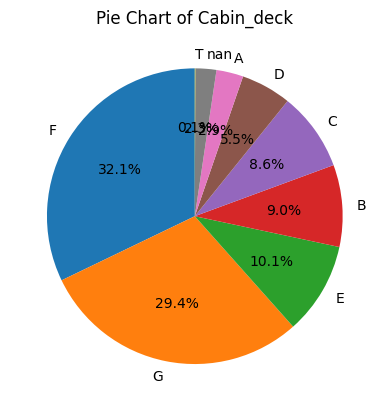

In [ ]:
do_pie(df_preprocessed, 'Cabin_deck')

The **cabin decks** seem to have some very real correlation with the target variable.

An issue with this is that Cabin T is severely underrepresented, A is very moderate-to-extremely underrepresented, and there are some null values that are completely split in their correlation with the target variable which will need to be inferred.

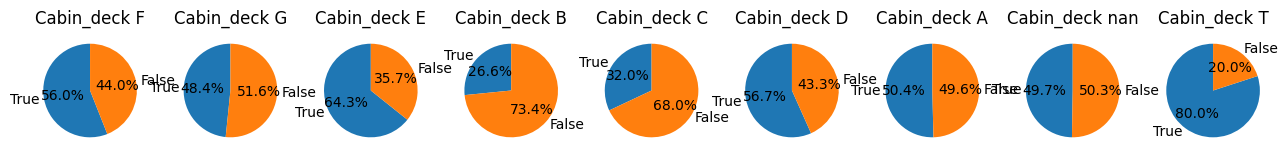

In [ ]:
plot_survival_representation(df_preprocessed, 'Cabin_deck')

#### Cabin Side

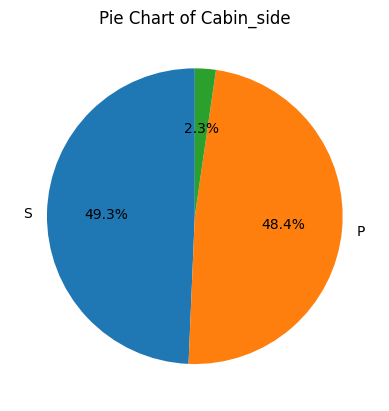

In [ ]:
do_pie(df_preprocessed, 'Cabin_side')

Looks like the Port side has a little more correlation with Transporting and Starboard side has 5% less people Transporting to another dimension than the general population sample.
* Also the null values are completely split, so it may be best to either randomly allocate or to infer the values

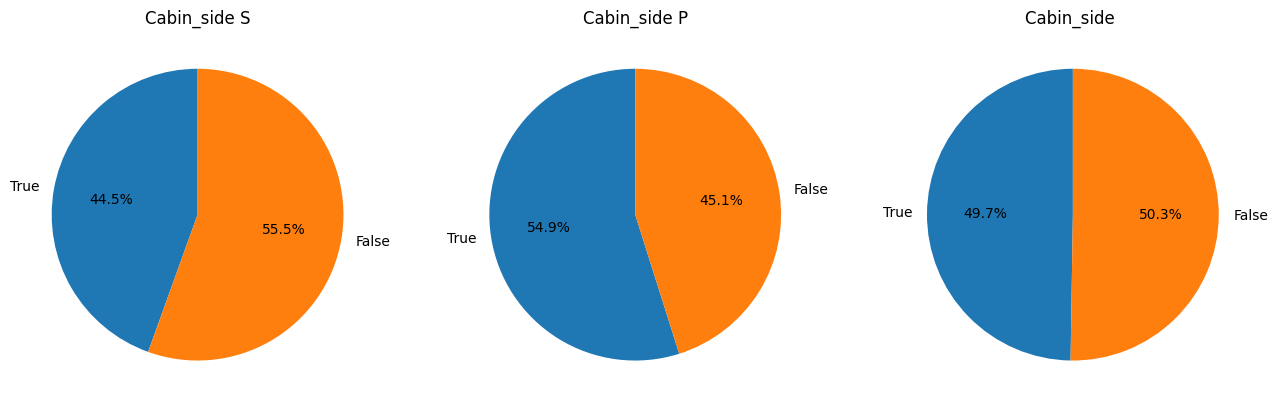

In [ ]:
plot_survival_representation(df_preprocessed, 'Cabin_side')

In [ ]:
print(sum(df_preprocessed['Cabin_side']=='') / len(df), "% of the passengers do not have a cabin accounted for.")

0.02289198205452663 % of the passengers do not have a cabin accounted for.


#### Cabin Number

It looks somewhat evenly split when we see the below stacked bar chart of the Cabin Number with transported. It seems like there may be some passengers between cabins 750 and 1250 who were more likely to be transported, and it looks like it's slightly more likely for those above cabin number 1500 to not be transported, but these may not be real correlations and simply trends from other variables.

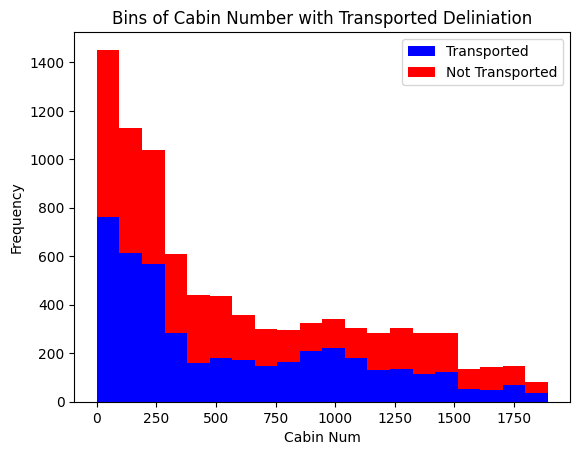

In [ ]:
# Separate the 'Age' values based on 'Transported' values
age_transported = df_preprocessed[df_preprocessed['Transported'] == True]['Cabin_num']
age_not_transported = df_preprocessed[df_preprocessed['Transported'] == False]['Cabin_num']

# Create a stacked histogram
plt.hist([age_transported, age_not_transported], bins=20, stacked=True, color=['blue', 'red'], label=['Transported', 'Not Transported'])

# Add labels and a legend
plt.xlabel('Cabin Num')
plt.ylabel('Frequency')
plt.title("Bins of Cabin Number with Transported Deliniation")
plt.legend()

# Show the histogram
plt.show()

#### <a id='toc1_3_1_13_'></a>[Preparing for Machine Learning](#toc0_)

In [ ]:
# At this point there should be no null values
assert(sum(df_preprocessed.isna().sum()) == 0)

In [ ]:
df_preprocessed.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Cabin_num', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin_deck_A',
       'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E',
       'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_deck_nan',
       'Cabin_side_', 'Cabin_side_P', 'Cabin_side_S', 'Age_group_1',
       'Age_group_2'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

train_data = []

# data_encoded = pd.get_dummies(df, columns=['Age_group', 'Sex', 'Pclass', 'Parch', 'SibSp', 'Embarked', 'Fare_class', 'family_sum'])
# test_data_encoded = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'Fare_class', 'family_sum'])

features = ['CryoSleep', 
            # 'Age',
            'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
            'Spa', 'VRDeck', 'Cabin_num',
            'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
            'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
            'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_deck_nan',
            'Cabin_side_', 'Cabin_side_P', 'Cabin_side_S',
            'Age_group_1', 'Age_group_2'
            ]
target = 'Transported'

X_train, X_test, y_train, y_test = train_test_split(df_preprocessed[features], df_preprocessed[target], test_size=0.20, random_state=42)

## <a id='toc1_4_'></a>[Machine Learning](#toc0_)

There are some observations to note when modifying the data:

* **Undersampling**: The metrics for all models improve accross the board when we skip the undersampling step. Perhaps this dataset is not large enough to undersample.
* **Grouping Age**: Grouping the ages seems to help with model prediction, seeing the best results when equally distributing the categories and thresholding the 'children group' at age 14 or so
* **Removing Fare Class**: The algorithms do not seem to lose much value when Fare Class is removed.

#### <a id='toc1_4_1_1_'></a>[Decision Tree Classifier](#toc0_)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create and train a Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predict using the test set
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Display the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1, end='\n' + '*' * 100 + "\n")
print("Confusion Matrix:\n", confusion)

Accuracy: 0.6942528735632184
Precision: 0.680089485458613
Recall: 0.711943793911007
F1 Score: 0.6956521739130436
****************************************************************************************************
Confusion Matrix:
 [[300 143]
 [123 304]]


In [ ]:
# Get feature importances
feature_importances = classifier.feature_importances_

# Match feature importances with feature names
feature_names = X_train.columns  # Replace with your actual feature names
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the features by importance (highest first)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display the most important features
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

Cabin_num: 0.4405
CryoSleep: 0.2189
HomePlanet_Earth: 0.0429
VRDeck: 0.0291
Spa: 0.0237
ShoppingMall: 0.0233
Destination_TRAPPIST-1e: 0.0215
Cabin_deck_E: 0.0205
Destination_55 Cancri e: 0.0177
Cabin_deck_G: 0.0173
Cabin_side_S: 0.0162
RoomService: 0.0145
Destination_PSO J318.5-22: 0.0137
Cabin_side_P: 0.0134
FoodCourt: 0.0129
HomePlanet_Mars: 0.0117
Age_group_1: 0.0110
Age_group_2: 0.0102
Cabin_deck_F: 0.0093
Cabin_deck_C: 0.0073
VIP: 0.0062
HomePlanet_Europa: 0.0059
Cabin_deck_B: 0.0058
Cabin_deck_D: 0.0031
Cabin_deck_A: 0.0021
Cabin_side_: 0.0006
Cabin_deck_nan: 0.0005
Cabin_deck_T: 0.0000


#### <a id='toc1_4_1_2_'></a>[Random Tree Forest](#toc0_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators = 2000, max_depth=10, random_state=42)
classifier.fit(X_train, y_train)

# Predict using the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Display the metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.7517241379310344
Confusion Matrix:
 [[354  89]
 [127 300]]


In [ ]:
from sklearn.tree import export_graphviz
import graphviz
# from sklearn.datasets import load_iris

# Extract a single decision tree from the Random Forest
decision_tree = classifier.estimators_[0]

# Visualize the decision tree using graphviz
dot_data = export_graphviz(decision_tree, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

# Save or display the graph
graph.render('decision_tree', format='png')  # Save the tree as 'decision_tree.pdf'
graph.view()  # Open the visualization in the default viewer

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.708491 to fit


'decision_tree.pdf'

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Display the metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.7413793103448276
Confusion Matrix:
 [[332 111]
 [114 313]]
Classification Report:
               precision    recall  f1-score   support

       False       0.74      0.75      0.75       443
        True       0.74      0.73      0.74       427

    accuracy                           0.74       870
   macro avg       0.74      0.74      0.74       870
weighted avg       0.74      0.74      0.74       870



#### GBT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(n_estimators=2000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Display the metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.7206896551724138
Confusion Matrix:
 [[331 112]
 [131 296]]
Classification Report:
               precision    recall  f1-score   support

       False       0.72      0.75      0.73       443
        True       0.73      0.69      0.71       427

    accuracy                           0.72       870
   macro avg       0.72      0.72      0.72       870
weighted avg       0.72      0.72      0.72       870



## Tensor ML

In [ ]:
df_tensor = pd.read_csv('./train.csv')
assert(len(df_tensor) > 0)

In [ ]:
df_tensor[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df_tensor[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
df_tensor.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Name            200
Cabin           199
Destination     182
RoomService     181
Age             179
PassengerId       0
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [ ]:
df_tensor[target] = df_tensor[target].astype(int)

In [ ]:
df_tensor[['VIP', 'CryoSleep']] = df_tensor[['VIP', 'CryoSleep']].astype(int)

In [ ]:
df_tensor[['Deck', 'Cabin_num', 'Side']] = df_tensor['Cabin'].str.split('/', expand=True)

In [ ]:
if 'Cabin' in df_tensor.columns:
    df_tensor.drop("Cabin", axis=1, inplace=True)

In [ ]:
import numpy as np

def split_dataset(dataset, test_ratio=0.20):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

train_pd, valid_pd = split_dataset(df_tensor)
print("{} examples in training, {} examples in testing.".format(len(train_pd), len(valid_pd)))

6900 examples in training, 1793 examples in testing.


In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

train_df = tfdf.keras.pd_dataframe_to_tf_dataset(train_pd, label=target)
valid_df = tfdf.keras.pd_dataframe_to_tf_dataset(valid_pd, label=target)

In [ ]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [ ]:
forest = tfdf.keras.RandomForestModel()
forest.compile(metrics=['accuracy'])

Use /var/folders/4f/6c2p53ln64s21k6dzcxg0hj00000gn/T/tmpq28odpu8 as temporary training directory


In [ ]:
forest.fit(x=train_df)

Reading training dataset...
Training dataset read in 0:00:01.620800. Found 6900 examples.
Training model...


[INFO 23-11-07 15:24:10.7967 CET kernel.cc:1233] Loading model from path /var/folders/4f/6c2p53ln64s21k6dzcxg0hj00000gn/T/tmpq28odpu8/model/ with prefix 9075e42a1e594057


Model trained in 0:00:15.747881
Compiling model...


[INFO 23-11-07 15:24:11.1114 CET decision_forest.cc:660] Model loaded with 300 root(s), 229844 node(s), and 13 input feature(s).
[INFO 23-11-07 15:24:11.1114 CET abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 23-11-07 15:24:11.1114 CET kernel.cc:1061] Use fast generic engine


Model compiled.


In [ ]:
tfdf.model_plotter.plot_model_in_colab(forest, tree_idx=0, max_depth=3)

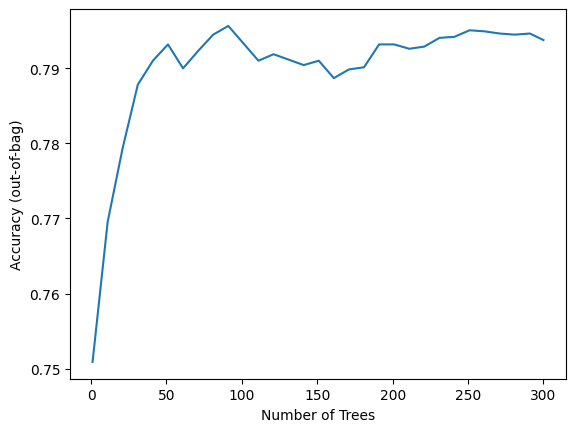

In [ ]:
logs = forest.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [ ]:
inspector = forest.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6900, accuracy=0.793768115942029, loss=0.5301106295291929, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
evaluation = forest.evaluate(x=valid_df, return_dict=True)

for name, value in evaluation.items():
    print(f"{name}: {value: .4f}")

2/2 [==============================] - 0s 36ms/step - loss: 0.0000e+00 - accuracy: 0.8026
loss:  0.0000
accuracy:  0.8026


In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
    print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #2), 134.0),
 ("RoomService" (1; #9), 61.0),
 ("Spa" (1; #12), 50.0),
 ("VRDeck" (1; #14), 24.0),
 ("FoodCourt" (1; #5), 14.0),
 ("ShoppingMall" (1; #10), 12.0),
 ("Deck" (4; #3), 3.0),
 ("Age" (1; #0), 1.0),
 ("HomePlanet" (4; #6), 1.0)]

In [ ]:
test_df = pd.read_csv('./test.csv')
submission_id = test_df['PassengerId']

test_df[['VIP', 'CryoSleep']] = test_df[['VIP', 'CryoSleep']].fillna(value=0)
# = test_df[['VIP', 'CryoSleep']].fillna(value=0)

test_df[['Deck', 'Cabin_num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)
test_df.drop("Cabin", axis=1)

test_df[['VIP', 'CryoSleep']] = test_df[['VIP', 'CryoSleep']].astype(int)

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

predictions = forest.predict(test_ds)
n_predictions = (predictions > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id, 'Transported': n_predictions.squeeze()})

output.head()

5/5 [==============================] - 0s 32ms/step


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [ ]:
output.to_csv('./submission.csv', index=False)

#### Test Predictions

In [ ]:
df_test = pd.read_csv('./test.csv')
df_test.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


In [ ]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Data cleaning pipeline
def preprocess(df):
    df = df.copy()

    # Set age to mean
    mean_age = df['Age'].mean()
    df['Age'].fillna(mean_age, inplace=True)

    # Bin Age
    bins = [0, 14, 30, 45, float('inf')]
    labels = [1, 2, 3, 4]
    df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
    df['Age_group'] = df['Age_group'].astype(int)

    def aggregate_families(x):
        return 2 if x >=2 else x

    # Drop bad columns
    df.drop(["Name", "Cabin", "Ticket", "PassengerId", "Age", "Fare"], axis=1, inplace=True)
    
    # Bin the family size
    df['Parch'] = df['Parch'].apply(aggregate_families)
    df['SibSp'] = df['SibSp'].apply(aggregate_families)

    # Set empty embarkment entries to Southhampton
    df['Embarked'].fillna('S', inplace=True)

    df['Pclass'] = df['Pclass'].astype(str)
    df['Age_group'] = df['Age_group'].astype(str)

    if "Parch" in df.columns:
        df['Parch'] = df['Parch'].astype(str)

    if "SibSp" in df.columns:
        df['SibSp'] = df['SibSp'].astype(str)

    data_encoded = pd.get_dummies(df, columns=['Age_group', 'Sex', 'Pclass', 'Parch', 'SibSp', 'Embarked',])

    return data_encoded

In [ ]:
preprocessed_df_test = preprocess(df_test)
preprocessed_df_test.head()

,Age_group_1,Age_group_2,Age_group_3,Age_group_4,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Parch_0,...,Fare_151.55,Fare_164.8667,Fare_211.3375,Fare_211.5,Fare_221.7792,Fare_227.525,Fare_247.5208,Fare_262.375,Fare_263.0,Fare_512.3292
0,False,False,True,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_test.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Age_group_1,Age_group_2,Age_group_3,Age_group_4,Parch_0,Parch_1,Parch_2,SibSp_0,SibSp_1,SibSp_2
709,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,True,False
439,False,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False
840,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False
720,False,True,False,True,False,False,True,True,False,False,False,False,True,False,True,False,False
39,False,False,True,True,True,False,False,True,False,False,False,True,False,False,False,True,False


In [ ]:
classifier.predict(preprocessed_df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Fare_0.0
- Fare_10.5
- Fare_10.7083
- Fare_106.425
- Fare_108.9
- ...
